In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
import numpy as np

import os


import matplotlib as mpl
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"
mpl.rcParams['font.size'] = 18

from matplotlib.gridspec import GridSpec

In [2]:
mask=np.load('/reg/d/psdm/cxi/cxilr6716/results/masks/basic_psana_mask.npy')
polar_correct = np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/polarization_-400encode.npy')
center=np.load('/reg/d/psdm/cxi/cxilr6716/scratch/derm/center_-400encoder.npy')

In [3]:
def unflatten_shots(flat_shots,mask):
    num_shots = flat_shots.shape[0]
    shape = mask.shape
    flat_mask = mask.reshape(shape[0]*shape[1]
                            )
    shots = np.zeros( (num_shots,shape[0]*shape[1]), dtype = flat_shots.dtype)
    shots[:, flat_mask ] = flat_shots
    
    return shots.reshape( (num_shots,shape[0],shape[1]))
def range_mask(img,min,max):
    return (img>min)*(img<max)
def donut_mask(mask,rmin,rmax):
    xx,yy=np.meshgrid(range(mask.shape[1]), range(mask.shape[0]))
    rr = np.sqrt((xx-center[0])**2+(yy-center[1])**2)
    return (rr>rmin)*(rr<rmax)*mask


def draw_circle(ax, radius, center,c='w'):
    circle1=plt.Circle(center,radius,color=c,
                       linewidth=3, fill=False,
                      linestyle='--',alpha=0.5)
    ax.add_artist(circle1)

In [31]:
run=109
file_dir = '/reg/d/psdm/cxi/cxilr6716/scratch/flatfield_calibration/flat_det_imgs/'
f_imgs=h5py.File(os.path.join(file_dir,'fullImgs_run%d.h5'%run), 'r')
single_shots = f_imgs['flat_img'][:1500]
single_shots_int = single_shots.mean(-1)
selection_mask = (single_shots_int>1.3)*(single_shots_int<95.7)
single_shots=single_shots[selection_mask]
single_shots_before=unflatten_shots( single_shots, mask)
sing_shots_after = single_shots_before/polar_correct[None,:,:]

In [32]:
mean_single_shot_after = sing_shots_after.mean(0)
mean_single_shot_before = single_shots_before.mean(0)
# mask.shape

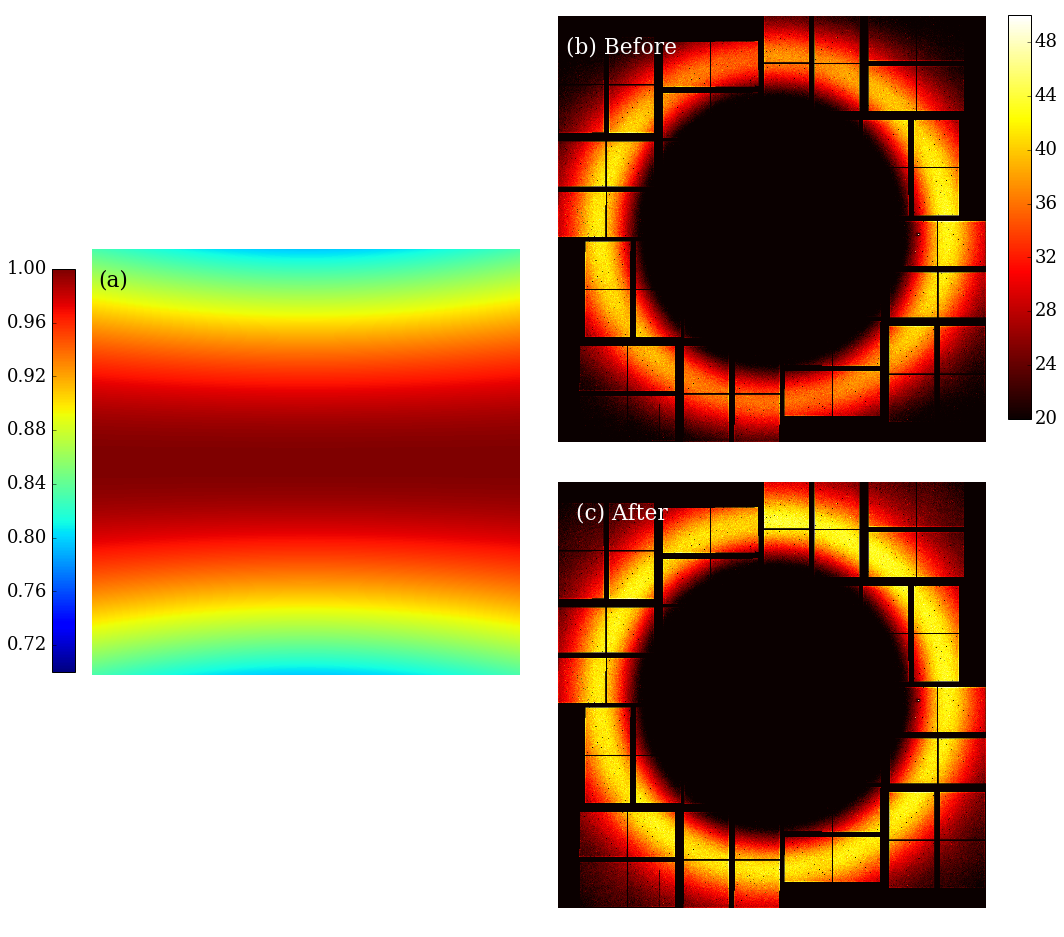

In [35]:
fig=plt.figure(figsize=[16,16])
gs = GridSpec(4,4)


####the polar_correction
ax = plt.subplot(gs[1:3,:2])
im=plt.imshow(polar_correct,aspect=1,
          cmap='jet',vmin=0.7,vmax=1)

ax.set_title('(a)', x= 0.05,y =0.9, color='Black')
ax.set_axis_off()

cbar_ax = fig.add_axes([0.09, 0.33, 0.02, 0.35])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('left')
####before
x=20
y=50
ax=plt.subplot(gs[:2,2:] )
img = donut_mask(mask,600,800)
ax.set_title('(b) Before', x= 0.15,y =0.9, color='White')
im=plt.imshow(mean_single_shot_before,aspect=1,
          cmap='hot',vmin=x,vmax=y)
ax.set_axis_off()

cbar_ax = fig.add_axes([0.92, 0.55, 0.02, 0.35])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.yaxis.set_ticks_position('right')


#####after
ax=plt.subplot(gs[2:,2:] )
ax.set_axis_off()
ax.set_title('(c) After', x= 0.15,y =0.9, color='White')
plt.imshow(mean_single_shot_after
           ,aspect=1,
          cmap='hot',vmin=x,vmax=y)

plt.savefig('polarization_correct.png',bbox_in_inches='tight')

In [34]:
ax.annotate?

In [76]:
mean_single_shot[img].mean()+mean_single_shot[img].std()

41.76422346890439